<a href="https://colab.research.google.com/github/Ira00/nn2022/blob/main/LR_5/LR_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №5
студентки 3 курсу групи КН-31
Івахненко Ірини

## Імпорт zip файла

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-04-25 11:31:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.130.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  72.6MB/s    in 23s     

2022-04-25 11:31:26 (67.2 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



## Перевірка вмісту папки

In [3]:
!ls 101_food_classes_10_percent


test  train


## Вибір класів відповідно до варіанту 6, 36, 66

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
my_class_names = [class_names[6], class_names[36], class_names[66]]
print(my_class_names)

['beignets', 'falafel', 'nachos']


## Функція для рандомного виводу зображення

Image shape: (385, 512, 3)


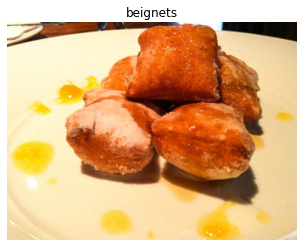

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class=my_class_names[0])

Image shape: (512, 512, 3)


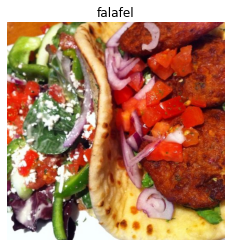

In [6]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class=my_class_names[1])

Image shape: (384, 512, 3)


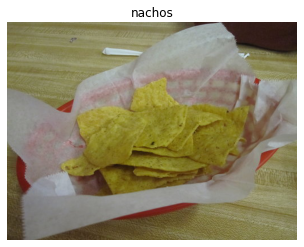

In [7]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class=my_class_names[2])

## Фільтрування даних, залишення лише відповідно варіанту

In [8]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

from pathlib import Path
import shutil

for i in class_names:
  if i not in my_class_names:
    dirpath = Path(train_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath = Path(test_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath) 
!ls 101_food_classes_10_percent/train/
!ls 101_food_classes_10_percent/test/

beignets  falafel  nachos
beignets  falafel  nachos


## Імпортування даних з каталогів і перетворення їх на пакети

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(test_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


## Навчання мережі

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_model = model.fit(train_data_augmented,
                          epochs=40,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/40
24/24 [==============================] - 12s 471ms/step - loss: 1.1117 - accuracy: 0.4827 - val_loss: 0.8839 - val_accuracy: 0.5556
Epoch 2/40
24/24 [==============================] - 11s 450ms/step - loss: 0.8368 - accuracy: 0.6147 - val_loss: 0.8648 - val_accuracy: 0.5778
Epoch 3/40
24/24 [==============================] - 11s 455ms/step - loss: 0.8180 - accuracy: 0.6147 - val_loss: 0.9251 - val_accuracy: 0.5911
Epoch 4/40
24/24 [==============================] - 11s 450ms/step - loss: 0.7822 - accuracy: 0.6307 - val_loss: 0.8459 - val_accuracy: 0.6000
Epoch 5/40
24/24 [==============================] - 11s 455ms/step - loss: 0.7302 - accuracy: 0.7013 - val_loss: 0.8337 - val_accuracy: 0.6444
Epoch 6/40
24/24 [==============================] - 11s 461ms/step - loss: 0.7321 - accuracy: 0.6747 - val_loss: 0.8999 - val_accuracy: 0.5778
Epoch 7/40
24/24 [==============================] - 11s 461ms/step - loss: 0.7385 - accuracy: 0.6720 - val_loss: 0.8906 - val_accuracy: 0.5644

## Зобразимо криві точності та втрат

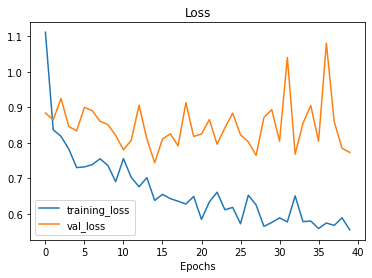

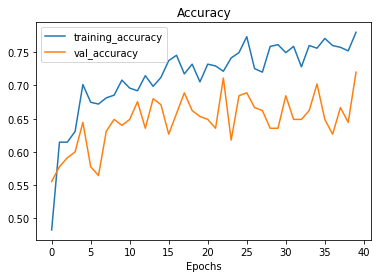

In [12]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history_model)

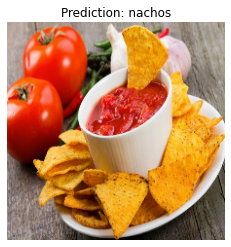

In [24]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1: 
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
pred_and_plot(model, "11.jpg", my_class_names)

## Висновок:
в ході лабораторної роботи вирішили завдання класифікації зображень їжі для 3 класів з набору даних food101.